In [1]:
import cmdfit

import matplotlib.pyplot as plt
%matplotlib inline

# Tutorial
Two objects perform the bulk of data storage for the code: the `cmdset` and `isochrone`. The `cmdset` object is responsible for holding data from observations and models, and several modes exist for creating them in order to allow for distinction between the relevant information in each case. The `isochrone` object is created from `cmdset` objects using the `'model'` mode. The `'isochrone'` essentially cuts the `'model' cmdset` by age, and extracts all models at a single age; this is a handy object for making comparisons to data, rather than dealing with the full `'model' cmdset` in some cases.


# 1 - Data Objects: `cmdset(mode)`
## Inputs:

The input parameter, **`mode`** is a string which will operate with the following inputs:

  + `'data'`
  + `'model'`
  + `'modeltest'`
***

In the tutorial below, running `cmdfit.cmdset(mode)` will bring up a simple interface which allows the user to select a data file and the data of interest for carrying out an analysis. The series of questions posed by this interface are in the following format: 

Several modes exist for this function and these are taken as the function parameters in the form of a string. For example: 
  
**`cmdfit.cmdset('modeltest')`**

Will create a cmdset object with the `'modeltest'` mode, which is one of the three modes currently available.


**Note on the `modeltest` mode:**

This mode is not explained further below, but it may be adaquately understood by reading about the two other modes below.

This mode is used to use magnitudes from a model; these cmdsets are the same as `model' cmdsets` except that they have an added attribute containing uncertainties (similar to `'data' cmdsets`) so that the data contained here may be considered as data with $\sigma_{ij}$ (see model.ipynb) in an analysis. The intent in allowing this option was to allow for code testing, wherein a model with known age, mass, etc. could be entered as mock data in order to check that the algorithms indeed find the correct parameters.  

The questions asked in the creation process here are the same as those asked in the creation of a 'model' cmdset (see section 1.2 below), as these objects always have the nominal $\pm 0.05$ dex uncertainty applied to them and so that selection process is skipped.
***


# 1.1 - The `'data' cmdset` Object

Data cmdsets are the objects that store data from observations.

## Attributes:
 * `cmdset_name.magnitudes`: The magnitudes of the stored data points.
 * `cmdset_name.uncertainties`: The photometric uncertainties '      '.
 * `cmdset_name.filename`: The file name from which the data was loaded.
 * `cmdset_name.kind`: A `string` to signal the kind of cmdset (will return `'data'` in this case).
 
The code controlling these objects is located in the cmdfit/data.py file.

## Loading observed data:
In order to load data, one should execute the following command in order to create a cmdset to store it:

**`cmdfit.cmdset('data')`**

This brings up an interface which asks the user to do the following:  
**Interface Overview:**
***
1. Select the desired data path (only the Hyades/ directory exists for data).  
2. Select the desired data file (the actual file containing your data).
3. A list is brought up to display the data columns found in the data file. The user is asked to enter the integer corresponding to the data column of interest. The corresponding integers are displayed to the right of the column header names.
4. Having selected a data column, the user is asked if they would like to select a column for entering uncertainties. These correspond to the $\sigma_{ij}$ discussed in model.ipynb...
  + Entering 'y' will have the code ask the user to enter an integer for the desired column of uncertainties. This selection should correspond to the uncertainties of the previously entered data column.
  + Entering 'n' will have the code apply a nominal value of $\pm 0.05$ dex in magnitude to the data instead.
5. The user is asked if they would like to enter another data column.
  + Entering 'y' repeats steps (3) and (4).
  + Entering 'n' completes the creation of the cmdset in 'data' mode.
***
Carrying out these steps will create a cmdset object using the `'data'` mode in order to hold observational data.
  
## Example: Creating a `'data'` `cmdset`

In [2]:
# Running this command will initate the process of loading in observational data to be manipulated:
example_data = cmdfit.cmdset('data')

SELECT DESIRED DATA PATH:
(Reading from /home/seth/Research/CMDfit/CMDfit/cmdfit/data.)
-----------------------------------------------
Select the desired directory from those found below:
0) Hyades
Enter the index of the desired directory (requesting type: int): 0
-----------------------------------------------
-----------------------------------------------
Select the desired file from those found below:
0) goldman_Hyades2MASS.txt
Enter the index of the desired file (requesting type: int): 0
-----------------------------------------------
Select data columns from goldman_Hyades2MASS.txt
0) rc
1) RV
2) Vpar
3) Vperp
4) Mass
5) Jmag
6) e_Jmag
7) Hmag
8) e_Hmag
9) Kmag
10) e_Kmag

ENTER COLUMN INDEX OF DESIRED FILTER:  (requesting type: int): 5
------------------------------------------------------------------------
ASSIGNING Jmag...for goldman_Hyades2MASS.txt

SELECT UNCERTAINTIES FOR Jmag.
LOAD FROM goldman_Hyades2MASS.txt? (If 'n', a nominal +/-0.05 dex will be used.) ('y' or 'n'): y

***
In the example above, I have loaded columns **5** (and then **6** for the uncertainties) and **7** (then **8** for the uncertainties) from goldman_Hyades2MASS.txt; these are the 2MASS J and H bands.
***

**Adding new data files:**  
Data files should be stored in cmdfit/data/dir_to_data/, where dir_to_data/ is a subdirectory meant to hold data specific to a cluster. By default, the Hyades subdirectory is the only directory present.

***
Now the data from Goldman 2013 has been loaded. The cmdset object has a number of attributes; cmdsets created with the `'data'` flag will have:
 
The magnitudes and uncertainties are Pandas dataframes, and they may be manipulated as such. For instance, taking a look at a few of the magnitudes may be done via:

In [3]:
# Here is how the magnitudes data frame might be accessed:
example_data.magnitudes.ix[:5,:]

,Jmag,Hmag
0,9.300,8.674
1,11.917,11.305
2,10.081,9.477
3,11.661,11.033
4,11.405,10.839
5,6.117,5.851


# 1.2 - The `'model' cmdset` Object
***
Model cmdsets are the objects that store data from models.
## Attributes:

 * `cmdset_name.magnitudes`: The magnitudes of the stored models.
 * `cmdset_name.initmasses`: The initial masses '              '.
 * `cmdset_name.ages`: The ages of the stored models.
 * `cmdset_name.filename`: The file name from which the models were loaded.
 * `cmdset_name.kind`: A `string` to signal the kind of cmdset (will return `'model'` in this case).
 
The code controlling these objects is located in the cmdfit/data.py file.

## Loading model data:
***
In order to load data, one should execute the following command in order to create a cmdset to store it:

Models may be loaded with the following command:

**`cmdfit.cmdset('model')`**

This brings up an interface similar to when creating a `'data' cmdset`; it asks the user to do the following:

1. Select the desired model path (by default only MIST_v0.31 exists).
2. Select the desired model file (the default models are MIST isochrone CMD files).
3. A list is brought up to display the data columns found in the model file. The user is asked to enter the integer corresponding to the data column of interest. The corresponding integers are displayed to the right of the column header names.
4. The user is asked if they would like to enter another data column.
  + Entering 'y' repeats steps (3) and (4).
  + Entering 'n' completes the creation of the cmdset in 'model' mode.
  
***
  
## Example: Creating a `'model'` `cmdset`

In [4]:
# Running this command will initate the process of loading in data to be manipulated:
example_model = cmdfit.cmdset('model')

SELECT DESIRED MODEL PATH:
(Reading from /home/seth/Research/CMDfit/CMDfit/cmdfit/model.)
-----------------------------------------------
Select the desired directory from those found below:
0) MIST_v0.31
Enter the index of the desired directory (requesting type: int): 0
-----------------------------------------------
-----------------------------------------------
Select the desired directory from those found below:
0) HBlim005
Enter the index of the desired directory (requesting type: int): 0
-----------------------------------------------
-----------------------------------------------
Select the desired file from those found below:
0) MIST_v0.31_feh_p0.00_afe_p0.0_vvcrit0.4_03to8M_HBlim005_full.iso.cmd
1) MIST_v0.31_feh_m0.25_afe_p0.0_vvcrit0.4_03to8M_HBlim005_fullINTERP.iso.cmd
2) MIST_v0.31_feh_m0.10_afe_p0.0_vvcrit0.4_03to8M_HBlim005_fullINTERP.iso.cmd
3) MIST_v0.31_feh_m0.05_afe_p0.0_vvcrit0.4_03to8M_HBlim005_fullINTERP.iso.cmd
4) MIST_v0.31_feh_p0.15_afe_p0.0_vvcrit0.4_03to8M_

Here, I have loaded the same color bands as I have loaded for my data cmdset: the 2MASS J and H bands. The model files are stored in cmdfit/models/... and are organized in different files by initial metallicity ([Fe/H]); I have loaded a model with [Fe/H] = 0.15. To see some of the data collected, the following may be done:

In [5]:
example_model.fullframe.ix[::10000,:]

,log10 age,Initial Mass,2MASS_J,2MASS_H
0,5.000000,0.315993,6.097977,5.167581
10000,7.688679,6.081383,1.902050,1.967022
20000,8.820755,2.448479,3.206507,3.123019


**Note: Mass Units**
In the MIST model files, initial mass is in units of solar mass.  

The MIST models contain blocks of data with each block corresponding to a different age isochrone. The separate blocks contain the full range of initial masses present in their respective isochrones, along with a range of other parameters but only the model magnitudes, age, and initial mass are stored in `'model'` cmdsets, as these are the relevant parameters to carry out the analysis.  

Additionally, there is a separate function that exists for loading all models from a directory as `cmdset` objects at once, and placing them into an array.

### 1.2.1 Loading All Models: `cmdfit.all_modelcmdsets()`

Executing this command will bring up an interface an creation process similar to creating a `'model' cmdset`, with the exception that the user will not be asked to load a model, they will onl be asked for the relevant directory and the desired filters. Given this information, this function will iterate over all model files in the selected directory and output an array of `model cmdsets`. All `cmdset` objects included in this array will have magnitudes stored according to the requested bands.


***
# 2 Data Objects: `isochrone(cmdset, age)`
## Inputs:

* The input parameter **`cmdset`** will accept any `'model'` or `'modeltest' cmdset` object created as described above. This represents the model file from which one wishes to draw the isochrone. As the MIST model files are organized by metallicity, this input parameter sets the metallicity of the isochrone. If a `'modeltest cmdset'` is used, uncertainties will be stored as well.

* The input parameter **`age`** is a `float` representing the $log_{10}$ age of the desired isochrone. If the entered age is not found, currently the code selects the nearest younger age instead. The maximum and minimum age range currently available ranges from $5$ to $10$ in $log_{10}$ age.
***

Model cmdsets created as shown above hold data on model stars collected from tables organized into isochrone blocks (i.e., all stars in one block have the same age). Often we are interested in comparing individual isochrones to data, and so if we would like to look at an individual isochrone from a dataset, we can create an isochrone object.
## Attributes:

 * `isochrone_name.age`: The age of the isochrone (`float`).
 * `isochrone_name.FeH`: The metallicity '      ' (`float`).
 * `isochrone_name.magnitudes`: The magnitudes of the stored models (Pandas `DataFrame`).
 * `isochrone_name.initmasses`: The initial masses '              ' (Pandas `DataFrame`).
 * `isochrone_name.kind`: The same as the attribute of the same name from the input `cmdset` object (`string`).
 * `isochrone_name.uncertainties`: *(Only if using a `'modeltest' cmdset`, see 1.1 for details on this attribute.)*

## Example: Creating an `isochrone`:
The isochrone object essentially extracts all of the data from a given model cmdset at a given age. The creation process is as follows:

In [6]:
# The function cmdfit.isochrone(cmdset, age) is responsible for creating an
# isochrone from a given cmdset object, at a given age:

example_isochrone = cmdfit.isochrone(example_model, age=8.6)

log10 age = 8.584906 was found.


In [7]:
# Accesing the stored initial masses:
example_isochrone.initmasses.ix[::100]

0      0.310313
100    1.448824
200    2.981031
300    3.013185
400    3.022704
Name: Initial Mass, dtype: float64

***
## 2.1 - Plot a CMD: `cmdfit.isoplotCMD(blue_band, red_band, isochrone, data)`

In order to have a look at the loaded data and any isochrones of interest on a color-magnitude diagram, the `cmdfit.isoplotCMD()` function may be used. This funtion takes the following:
### Input:
  * **`blue_band`**: (`int`) The index corresponding the shorter wavelength band of light.
  * **`red_band`**: (`int`) The index corresponding the longer wavelength band of light.
  * **`isochrone`**: (`isochrone class`) An `isochrone` object created as described above.
  * **`data`**: (`cmdset class`) A `cmdset` object created with the `'data'` mode as described in 1.1.
### Example: Plotting a CMD with an isochrone and data

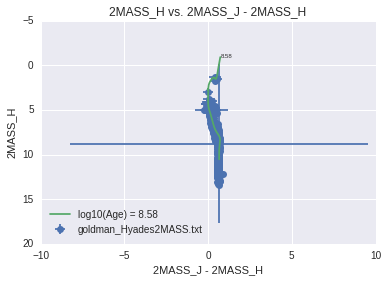

In [8]:
# Here is an example of the function in use. the blue band index here is 0, corresponding
# to the 2MASS J band according to what we entered earlier on in the tutorial when the
# example_data cmdset was created (e.g. section 1.2). The red_index is 1, corresponding to the
# second column od the magnitude DataFrame (this is the H band from ealier).

cmdfit.isoplotCMD(0,1, example_isochrone, example_data)

**A few things...**
As may be seen, the data has some very large error bars in certain cases. This may be treated by performing a cut on the allowed uncertainty range we want to consider for the data.
### 2.1.1 - Cutting Data by Uncertainty: `cutuncert(lower_limit, upper_limit)`
This function operates on `'data' cmdsets`.
#### Input:
  * **`lower_limit`**: (`float`) The desired lower limit for cutting on uncertainty values.
  * **`upper_limit`**: (`float`) '          ' upper '                                     '.

Here is an example of using the function:

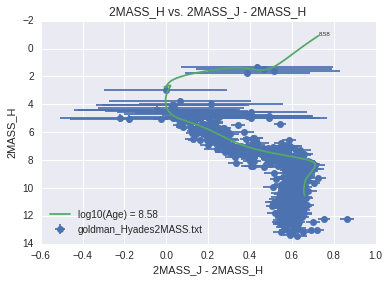

In [9]:
example_data.cutuncert(0.0, 0.5)
cmdfit.isoplotCMD(0,1, example_isochrone, example_data)

As may be seen, the data points with the very large error bars have been eliminated, but a few still remain which have quite large uncertainties. These may be cut if desired by using the command to restrict the uncertainty range as much as desired.

There are a lot of data points available too. This is not always convenitent, and so if fewer datapoints are desired, currently two operations exist:

### 2.1.2 - Cutting Data by Magnitude: `datacutmags(lower_limit, upper_limit)`
This function operates on `'data' cmdsets`.
#### Input:
  * **`lower_limit`**: (`float`) The desired lower limit for cutting on magnitude values.
  * **`upper_limit`**: (`float`) '          ' upper '                                  '.

(*Note: Astronomers usually think negative magnitudes are larger than positive ones, but here lower_limit truly refers to the lesser of the desired range.*) Here is an example of using the function:

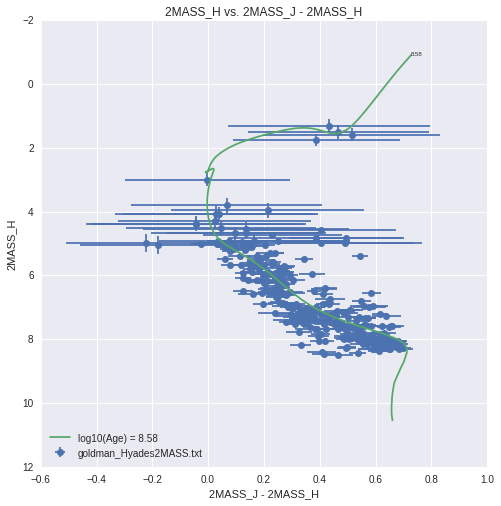

In [10]:
# First I will make a copy of the loaded dataset so that we do not erase the original:
import copy

data_reduced = copy.copy(example_data)

# Now to cut the range of magnitudes:

data_reduced.datacutmags(1, 9)

fig = plt.figure(figsize=(8,8))
# Plotting the reduced data set:
cmdfit.isoplotCMD(0,1, example_isochrone, data_reduced)

### 2.1.3 - Random Sampling: `randsamp(number_of_random_samples)`
This function operates on `'data' cmdsets`.
#### Input:
  * **`number_of_random_samples`**: (`int`) The desired number of random samples from the data set being operated on.

Here is an example of using the function:

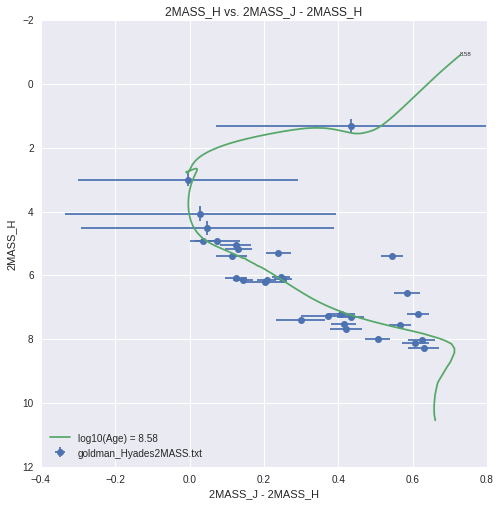

In [11]:
# This function will randomly select the given number of datapoints 
# from the data set that it operates on, here 30 points will be sampled:
data_reduced.randsamp(30)

fig = plt.figure(figsize=(8,8))
# Plotting the reduced data set:
cmdfit.isoplotCMD(0,1, example_isochrone, data_reduced)

Using these commands, we can examine our data and models. Additionally, a group of isochrones may be plotted as well; this involves first creating an isochrone set:

### 2.1.4 - Creating Isochrone Sets: `makeisoset(lower_age, upper_age)`

This function operates on `'model'` or `'modeltest' cmdsets`.
#### Input:
  * **`lower_age`**: (`float`) The desired lower limit for the isochrone age range.
  * **`upper_age`**: (`float`) '          ' upper '                              '.

The output of this function is an array of isochrone objects collected from the `cmdset` on which it operates from within the age range supplied. Here is an example of using the function:

### 2.1.5 - Plotting Multiple Isochrones: `cmdfit.multiisoCMD(isochrone_set, dataset)`
#### Input:
  * **`isochrone_set`**: (`isochrone class array`) An array of `isochrone` objects (see above) created manually or as described in section 2.1.
  * **`dataset`**: (`cmdset class`, `optional`) A `'data' cmdset` object (sect. 1.1) may be given if one wishes to plot data along with the isochrone set.  

Here are two examples showing first creating a plot of several isochrones on a CMD by themselves...

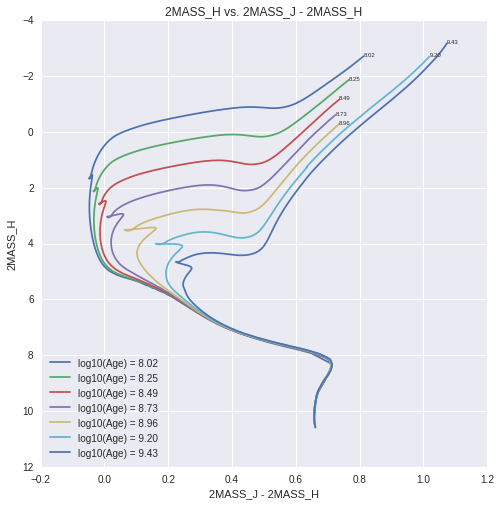

In [12]:
# makeisoset() operates on a model cmdset and takes a lower and upper age limit as input:
isochrone_set = example_model.makeisoset(8.0, 9.6)

fig = plt.figure(figsize=(8,8))
# multiisoCMD() may be used to plot an array of given isochrones by themselves:
cmdfit.multiisoCMD(isochrone_set[::5])

...and along with a data set:

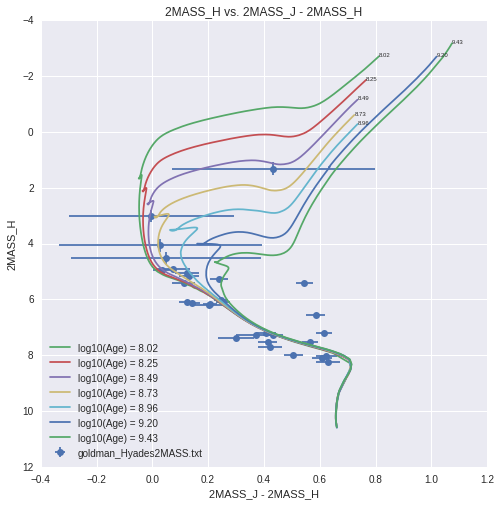

In [13]:
fig = plt.figure(figsize=(8,8))

# multiisoCMD() may be used to plot an array of given isochrones with data too:
cmdfit.multiisoCMD(isochrone_set[::5], data_reduced)

# 3 - Fitting Models to Data

The majority of this code has been developed to perform Bayesian parameter estimation of stellar clusters by matching data (like what is shown above) to models (e.g. the isochrones above). To carry out this task, two commands exist:

  * `cmdfit.fitall()`
  * `cmdfit.fitsingle(mode, ndim)`
  
Right now, the `fitall()` function is still a **WIP**. The runtimes are currently very long and I do not advise using it (currently the number of walkers and steps used in  the MCMC algorithms there are very few, and so the statistics are bad, besides the runtimes being very long.)  

The `fitsingle(mode, ndim)` function does work however, and shows a proof of concept that the method used works in principle.

## 3.1 - Fitting Isochrones to a Single Star: `cmdfit.fitsingle(mode, ndim)`

### Input:
  * **`mode`**: (`string`) Two modes, `'data'` and `modeltest'` currently exist.
  * **`ndim`**: (`int`, `optional`) The number of dimesions with which to carry out the statistical analysis outlined in model.ipynb.
    + `ndim = 3` (default): Ignore field star probability and secondary initial mass (no binaries or field stars).
    + `ndim = 4`          : Include secondary initial mass (binaries), negelct field star probability.
    + `ndim = 5`          : Include both field star probability and secondary initial mass.
    
*(Note: [Fe/H], $log_{10}$ age, and initial primary mass are always included by default.)*
    
Running this function will first generate an interface similar to what was described in section 1 in the `cmdset` creation process. The reason why is because the user is essentially asked to first create a `cmdset` which will act as data (below this is a `'modeltest' cmdset`), and they are asked to select the directory and filters to be used in creating an array of all `'model' cmdsets` within that directory (see section 1.2.1). In selecting the filters for data and subsequently for all models, the selected bands should match (so if 2MASS J and H are selected for data, 2MASS J and H should be selected for all models also). This array of models forms the available selection of model parameters with which the statistical analysis will be carried out.

Following this process, the code will load the models and run `emcee`'s `EnsembleSampler()` sampling algorithm to perform a parameter estimataion of the parameters included.

SELECT DESIRED MODEL PATH:
(Reading from /home/seth/Research/CMDfit/CMDfit/cmdfit/model.)
-----------------------------------------------
Select the desired directory from those found below:
0) MIST_v0.31
Enter the index of the desired directory (requesting type: int): 0
-----------------------------------------------
-----------------------------------------------
Select the desired directory from those found below:
0) HBlim005
Enter the index of the desired directory (requesting type: int): 0
-----------------------------------------------
-----------------------------------------------
Select the desired file from those found below:
0) MIST_v0.31_feh_p0.00_afe_p0.0_vvcrit0.4_03to8M_HBlim005_full.iso.cmd
1) MIST_v0.31_feh_m0.25_afe_p0.0_vvcrit0.4_03to8M_HBlim005_fullINTERP.iso.cmd
2) MIST_v0.31_feh_m0.10_afe_p0.0_vvcrit0.4_03to8M_HBlim005_fullINTERP.iso.cmd
3) MIST_v0.31_feh_m0.05_afe_p0.0_vvcrit0.4_03to8M_HBlim005_fullINTERP.iso.cmd
4) MIST_v0.31_feh_p0.15_afe_p0.0_vvcrit0.4_03to8M_

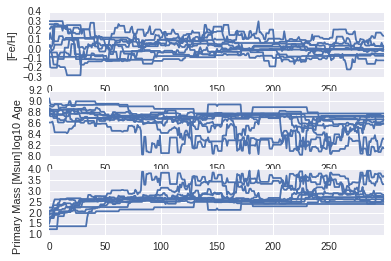

Enter an integer for where to cut off the burn-in period: 100

MAP Values:
      Primary Mass    [Fe/H]  log10 Age
0.16      2.488726 -0.067590   8.343627
0.50      2.650659  0.004112   8.695771
0.84      3.320319  0.097741   8.781249

log10 age = 8.301887 was found.
log10 age = 8.679245 was found.
log10 age = 8.773585 was found.


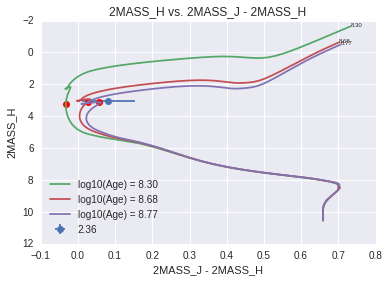


Original Model Parameters:
[0.1, 8.8679245283018879, 2.3599390714989372]



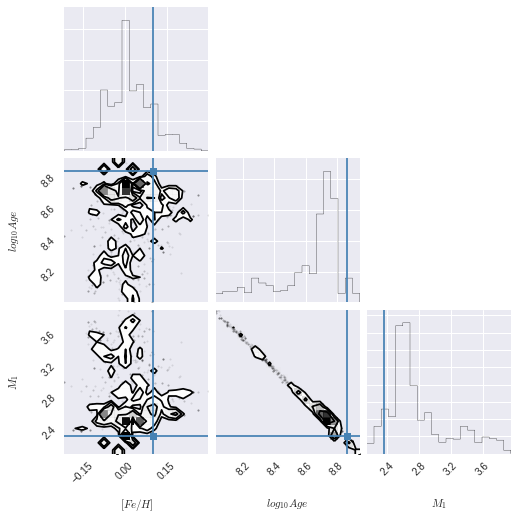

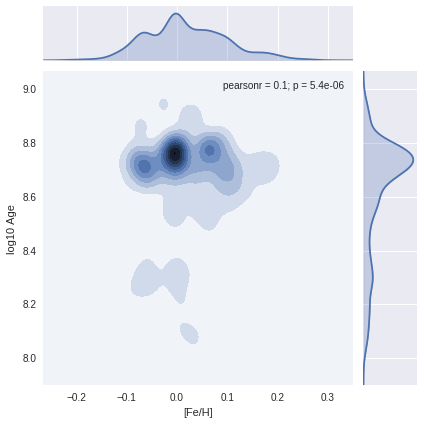

CPU times: user 2min 4s, sys: 368 ms, total: 2min 4s
Wall time: 2min 44s


In [14]:

% time paramframe, sampler = cmdfit.fitsingle('modeltest', ndim=3)

The output above show in order:

 + The walker behavior over the course of 300 steps (only showing first 10 walkers).
 + The MAP values found by the samplers
 + A plot of the nearest isochrone found which matches the given star.
 + The original model parameters: [Fe/H, log10 age, initial primary mass]
 + A corner plot showing maringal distributions for the log10 age, initial primary mass, and metallicity.
 + A final joint plot showing the joint posterior found for log10 age and metallicity.
 
The code comes close to finding the original model parameters, however the results are a bit off. What is strange currently is that the 68% interval isochrones do not bound the data point, and the MAP isochrone is not near the data point either. This indicates that likely some recent changes have created additional errors.

The code is running siginificantly faster at present however at 2 min run times opposed to 10 min before.
## With `ndim` = 4 (including binaries)

SELECT DESIRED MODEL PATH:
(Reading from /home/seth/Research/CMDfit/CMDfit/cmdfit/model.)
-----------------------------------------------
Select the desired directory from those found below:
0) MIST_v0.31
Enter the index of the desired directory (requesting type: int): 0
-----------------------------------------------
-----------------------------------------------
Select the desired directory from those found below:
0) HBlim005
Enter the index of the desired directory (requesting type: int): 0
-----------------------------------------------
-----------------------------------------------
Select the desired file from those found below:
0) MIST_v0.31_feh_p0.00_afe_p0.0_vvcrit0.4_03to8M_HBlim005_full.iso.cmd
1) MIST_v0.31_feh_m0.25_afe_p0.0_vvcrit0.4_03to8M_HBlim005_fullINTERP.iso.cmd
2) MIST_v0.31_feh_m0.10_afe_p0.0_vvcrit0.4_03to8M_HBlim005_fullINTERP.iso.cmd
3) MIST_v0.31_feh_m0.05_afe_p0.0_vvcrit0.4_03to8M_HBlim005_fullINTERP.iso.cmd
4) MIST_v0.31_feh_p0.15_afe_p0.0_vvcrit0.4_03to8M_

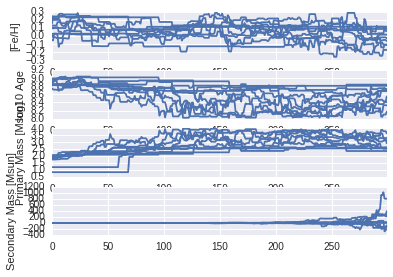

Enter an integer for where to cut off the burn-in period: 100

MAP Values:
      Primary Mass  Secondary Mass    [Fe/H]  log10 Age
0.16      2.553678       -5.113312 -0.060294   8.166960
0.50      2.945942        1.086381  0.080580   8.535818
0.84      3.653356       21.881072  0.138061   8.811513

log10 age = 8.160377 was found.
log10 age = 8.490566 was found.
log10 age = 8.773585 was found.
The magnitudes found for the secondary star: [inf, inf].


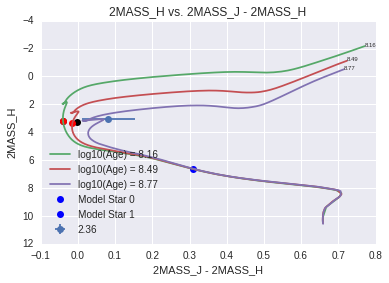


Original Model Parameters:
[0.1, 8.8679245283018879, 2.3599390714989372, 0.5]



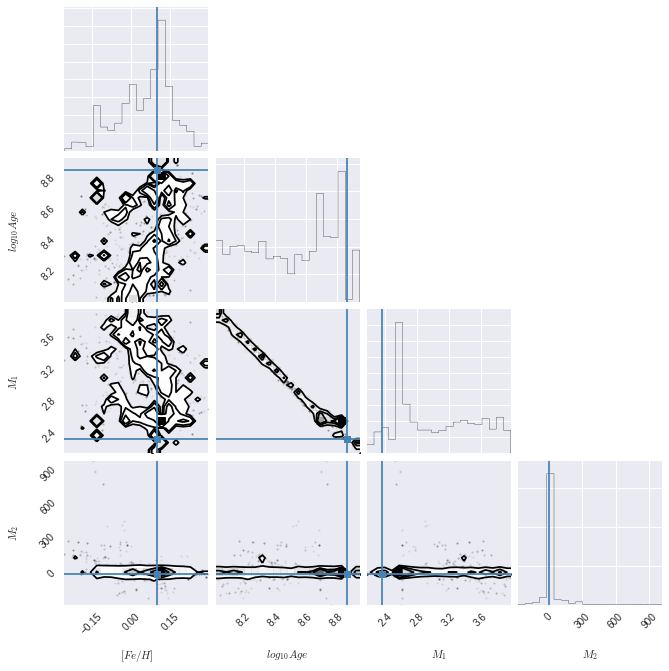

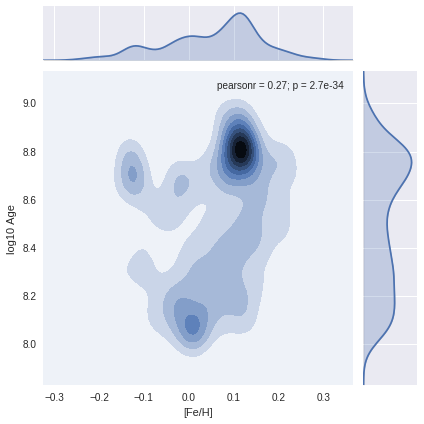

CPU times: user 2min 1s, sys: 324 ms, total: 2min 1s
Wall time: 2min 50s


In [15]:
%time paramframe2, sampler2 = cmdfit.fitsingle('modeltest', ndim=4)

## With `ndim = 5` (Including binaries & field stars)

SELECT DESIRED MODEL PATH:
(Reading from /home/seth/Research/CMDfit/CMDfit/cmdfit/model.)
-----------------------------------------------
Select the desired directory from those found below:
0) MIST_v0.31
Enter the index of the desired directory (requesting type: int): 0
-----------------------------------------------
-----------------------------------------------
Select the desired directory from those found below:
0) HBlim005
Enter the index of the desired directory (requesting type: int): 0
-----------------------------------------------
-----------------------------------------------
Select the desired file from those found below:
0) MIST_v0.31_feh_p0.00_afe_p0.0_vvcrit0.4_03to8M_HBlim005_full.iso.cmd
1) MIST_v0.31_feh_m0.25_afe_p0.0_vvcrit0.4_03to8M_HBlim005_fullINTERP.iso.cmd
2) MIST_v0.31_feh_m0.10_afe_p0.0_vvcrit0.4_03to8M_HBlim005_fullINTERP.iso.cmd
3) MIST_v0.31_feh_m0.05_afe_p0.0_vvcrit0.4_03to8M_HBlim005_fullINTERP.iso.cmd
4) MIST_v0.31_feh_p0.15_afe_p0.0_vvcrit0.4_03to8M_

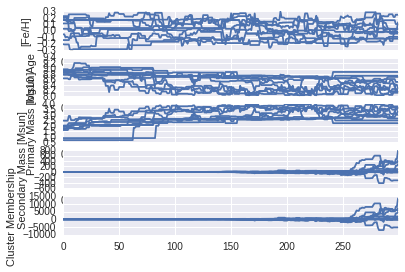

Enter an integer for where to cut off the burn-in period: 150

MAP Values:
          Pfield  Primary Mass  Secondary Mass    [Fe/H]  log10 Age
0.16 -435.532431      2.609982      -24.458202 -0.130954   8.145363
0.50  -38.395535      3.004455       -1.648364 -0.004663   8.498336
0.84  623.314812      3.718693       36.705541  0.148173   8.714719

log10 age = 8.113208 was found.
log10 age = 8.490566 was found.
log10 age = 8.679245 was found.


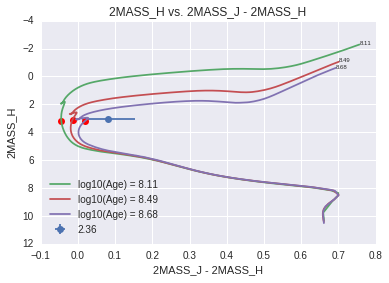


Original Model Parameters:
[0.1, 8.8679245283018879, 2.3599390714989372, 0.5, 0.0]



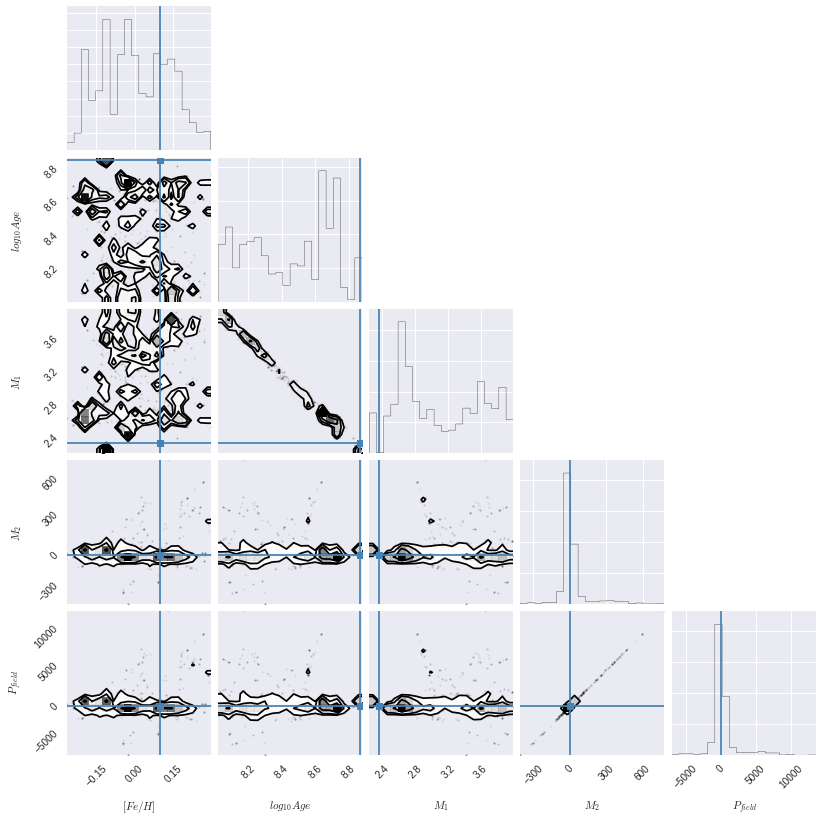

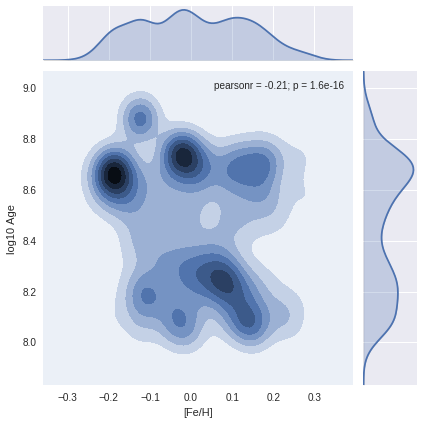

CPU times: user 1min 59s, sys: 368 ms, total: 2min
Wall time: 2min 31s


In [16]:
%time paramframe3, sampler3 = cmdfit.fitsingle('modeltest', ndim=5)